<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2024 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name: Niko Itänen
#### student id: 2110412 
#### email: nmitan@utu.fi

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.
- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.
- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- <b>Grading criteria:</b>
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    - To pass, you must complete the required parts 1-4.
    - To achieve Pass with honors, complete the bonus exercises.
- <b>Technical issues:</b>
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at tuhlei@utu.fi, aibekt@utu.fi.
- <b>Use of AI and large language models:</b>
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.
- <b>Additional notes:</b>
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    - Ensure all your answers are concise—typically a few sentences per question.
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
 are run in sequence.


<font color = green> The guided exercise session is held on the 27th of November at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 2nd of December at 23:59</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.

In [25]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1000 rows from the dataframe using a fixed random seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: As mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's a new variable, `gluc` (about glucose aka blood sugar levels), which is also one-hot-encoded for you. It has similar values as `cholesterol`.*


In [26]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [27]:
### Code - Resample and print 15 rows

# Set random seed
np.random.seed(111)

# Take sample of 1000 rows
sample_data = cardio_data.sample(n=1000)

# Print 15 rows of the sample
sample_data.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
2555,59,0,152,72.0,130,80,0,0,1,0,0,1,0,0,1,0
2758,42,1,173,70.0,120,80,0,0,1,0,1,0,0,1,0,0
5142,63,0,157,84.0,120,80,0,0,1,1,1,0,0,1,0,0
3233,58,1,169,70.0,120,80,0,0,1,0,1,0,0,1,0,0
1817,44,0,163,51.0,100,70,0,0,1,0,1,0,0,1,0,0
1303,49,0,164,78.0,130,80,0,0,1,0,0,1,0,0,0,1
1120,59,0,160,67.0,120,80,0,0,0,0,1,0,0,1,0,0
3202,56,0,169,79.0,130,90,0,0,1,0,1,0,0,1,0,0
3313,52,0,170,85.0,120,80,0,0,1,0,1,0,0,1,0,0
3164,47,0,166,86.0,110,70,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results. To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings. In fact, we already used one when sampling our subset from the loaded dataset.

**Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [28]:
### Code - Train-test split

# Create new dataframes
x = sample_data.drop(columns=['cardio']).values # Features such as age, sex, height, weight, etc.
y = sample_data['cardio'].values # Target variable (binary feature 'cardio')

# Seed
np.random.seed(111)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

print("Training set size: ", len(x_train))
print("Test set size: ", len(x_test))

Training set size:  800
Test set size:  200


I would say that stratification is needed because the target variable "cardio" is a categorical variable. Without stratification, the result might be unfair and the model might not perform as well. Stratification would not be so necessary if the data itself were more balanced, but in this situation I think stratification is the best choice.

----------

**Exercise 1 C)** 

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [29]:
### Code - Standardization

# Define the numerical feature indices
numerical_features = [0, 2, 3, 4, 5] # age, height, weight, ap_hi, ap_lo

# Standardize the numerical features
scaler = StandardScaler()
x_train[:, numerical_features] = scaler.fit_transform(x_train[:, numerical_features])
x_test[:, numerical_features] = scaler.transform(x_test[:, numerical_features])

# Print the first row to see the changes.
# From the output, we can see that the numerical features are standardized.
print("First row of the train set: \n", x_train[numerical_features[1]])
print("First row of the test set: \n", x_test[1])

First row of the train set: 
 [-1.36340815  0.         -1.35136255  0.54056815 -0.16068496 -0.05101418
  0.          0.          1.          1.          0.          0.
  1.          0.          0.        ]
First row of the test set: 
 [-0.47843734  0.          0.29234516 -0.54237305 -0.16068496 -0.05101418
  0.          0.          1.          1.          0.          0.
  1.          0.          0.        ]


As we know, the k-NN algorithm makes predictions by measuring the distance between the test points and the points in the training data. When the features are not constant, it means that they can have very different ranges and scales. Without standardization, larger scale features such as age dominate the distance calculations compared to smaller scale features such as binary features like smoke or activity. The clear answer to the question is that without standardization, the prediction result may be inaccurate.

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [30]:
### Code - the kNN classifier

# Create a kNN
knn = KNeighborsClassifier(n_neighbors=3) # n-neighbors = k

# Train the model
knn.fit(x_train, y_train)

# Confuson matrix
y_pred = knn.predict(x_test) # Predict the test set
conf_matrix = metrics.confusion_matrix(y_test, y_pred) # Confusion matrix from the test set and the predicted values
print("Confusion matrix: \n", conf_matrix)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred) # Accuracy from the test set and the predicted values
print("Accuracy: ", accuracy)

Confusion matrix: 
 [[118  21]
 [ 39  22]]
Accuracy:  0.7


The confusion matrix shows us four different cells that indicate whether the predicted values were correct or not. These four cells include a calculation of what was done to the outcome model.

Top left cell = True Negatives (TN), which shows the cases where the patient does not have the disease and the model predicted it correctly.

Top right cell = False Positive (FP), indicating cases where the patient does not have the disease but the model predicted it incorrectly.

Bottom left cell = False Negatives (FN), indicating cases where the patient has the disease but the model incorrectly predicted it.

Lower right cell = True Positives (TP), indicating cases where the patient has the disease and the model correctly predicted it.

The model appears to identify patients without cardiovascular disease (TN), which may be due to the relatively small sample size of the data, which includes many more cases without disease. 

The precision itself may also be misleading because it gives equal weight to TN and TP. Its performance in the minority category of patients with cardiovascular disease may be weaker.

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [31]:
### Code - Leave-one-out cross-validation

# Create leave-one-out splitter
loo = LeaveOneOut()
scores = cross_val_score(knn, x, y, cv=loo, scoring='accuracy')
# Calulate the mean accuracy
mean_accuracy = scores.mean()

# Print the result
print("Mean accuracy: ", mean_accuracy)

Mean accuracy:  0.725


### What can you say about the accuracy compared to the previous task?
Leave-one-out cross-validation yielded slightly better accuracy compared to previous accuracy, suggesting that the k-NN model may generalise slightly better with this approach.

### What do you think: Does the k-NN model work for the problem in hand?
Although the k-NN model is a step in the right direction, the 72.5% accuracy is not, in my opinion, reliable for drawing real and robust conclusions in a medical context. The model should achieve 90-100% accuracy to be of real use. So I would say that there is still work to be done to make the model work better.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k, and use default values for all the other hyperparameters. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire sample of 1000 on this task.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

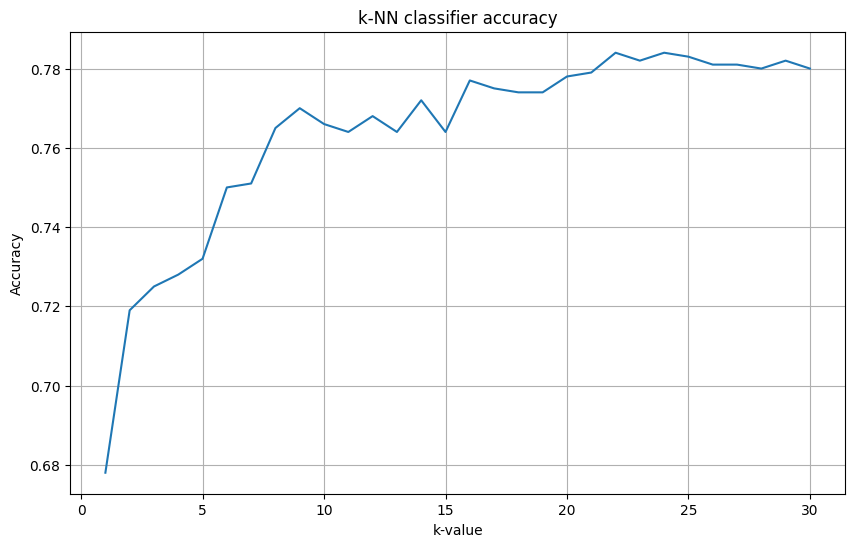

Best k-value is 22 with accuracy of 0.784


In [32]:
### Code - Select best model

# Define hyperparameters
k_values = range(1, 31) # k-values from 0 to 30

# A new array for the mean accuracies
accuracies = []

# Loop the score-tests for all different k-values.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=loo, scoring='accuracy')
    accuracies.append(scores.mean())

### Code - Plot the accuracies vs. the values for k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.title('k-NN classifier accuracy')
plt.grid()
plt.show()

# Fing the best k-value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)
print(f'Best k-value is {best_k} with accuracy of {best_accuracy}')

Running our code above, we can see that a k-value of 22 gives the best accuracy of 78.4%, which is again an improvement, but we are still quite far from reliable accuracy. We now know that a model with 22 neighbours is a model we will use for at least some time.

When we look at the graphs of different k values and accuracies, we can see that the model performance improves quite rapidly until a k value of about 8. Beyond this value, the improvement in accuracy is not very large. When the k value reaches 20, the accuracy varies regardless of the k value.

Choosing a low k-value makes the model more sensitive to noise and outliers, which can lead to overfitting, especially if the data set is small, as in our case. On the other hand, a larger k-value gives a smoother result, but requires many more resources due to the large number of computations, making it less efficient. A higher k-value can also lead to easier underfitting if our dataset is not balanced (this is where the importance of standardization comes in).

_____________________

## <font color = darkorange> 4. Ridge regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healthy/sick) to estimating continuous values. The following exercises are going to involve utilizing one regression model, <font color = darkorange>Ridge Regression</font>, and our goal is to evaluate the performance of this model. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as


| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [33]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

possum_data.head()

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,60.4,54.5,15.2,74.5,360.0,280.0,360.0,890.0
1,1,6.0,92.5,57.6,51.2,16.0,72.5,365.0,285.0,330.0,915.0
2,1,6.0,94.0,60.0,51.9,15.5,75.4,390.0,300.0,340.0,955.0
3,1,6.0,93.2,57.1,52.2,15.2,76.1,380.0,280.0,340.0,920.0
4,1,2.0,91.5,56.3,53.2,15.1,71.0,360.0,285.0,330.0,855.0


-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examining those relationships between the variables in the given dataset.


**Exercise 4 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

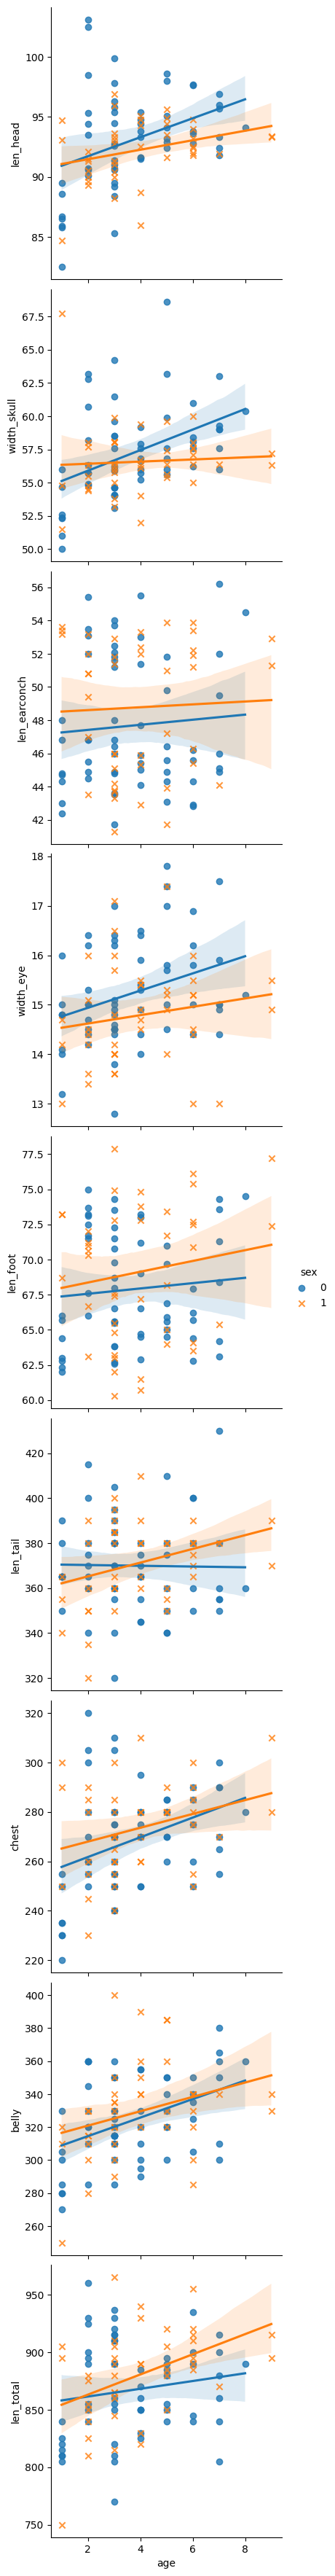

In [34]:
### Code - Pairplot

# Define the needed features
features = ['len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 'len_tail', 'chest', 'belly', 'len_total']

# Pairplot
sns.pairplot(possum_data, x_vars='age', y_vars=features, hue='sex', kind='reg', markers=['o', 'x'], height=4)

plt.tight_layout
plt.show()

When looking at the pairplots, the highest correlation between age and other features is found for male possumes in:
- Length of head
- Width of skull
- Width of eyes
- Size of chest
- Size of belly

No correlation (or very weak correlation) can be observed for male possumes in:
- Length of earconch
- Length of foot

There is also negative correlation for male possumes in length of tail.

The highest correlation between age and other features is found for female possumes in:
- Length of head
- Width of eyes
- Length of foot
- Length of tail
- Size of chest
- Size of belly

No correlation (or very weak correlation) can be observed for female possumes in:
- Width of skull
- Length of earconch

There are no negative correlation for female possumes at all.

We can see that age does correlate with animal characteristics. Male piglets have slightly less correlation than females in total. It is also interesting that the correlations between different traits can vary between the sexes of the possumes. For example, there are significant differences in the correlations between the tail lengths of male and female piglets: male piglets have smaller tails when they are older, while females have longer tails.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to test the overall performance of the model using the test set.

**Exercise 4 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

*Note: Set the features in the dataframe named as `possum_X` so you can play around with the upcoming code snippet.*

In [35]:
### Code - Data preparation

# Define the features again
possum_X = pd.DataFrame(possum_data)

print(possum_X.dtypes)

# Check for missing values
missing_values = possum_data.isnull().sum()
print(missing_values, "\n") # Print the sum of missing values

# Outlier values
# Brushtailed possums can live up to 13 years in the wild (4)
# They can have a tail length of up to 40 cm, where I accept 45 cm as an outlier. (4)
# They can have a head and body length of up to 58 cm, where I accept 70 cmm as an outlier. (4)
outliers = possum_data[(possum_data['age'] > 13) | (possum_data['len_tail'] > 450) | ((possum_data['len_total']) - (possum_data['len_tail']) > 700)] # cm to mm
print(outliers, "\n") # Print the outlier values

# Standardize the data
scaler = StandardScaler()
x = scaler.fit_transform(possum_data[possum_X.columns])
y = scaler.fit_transform(possum_data[['age']])
print(x[0:2]) # Print the first two rows of the standardized data to see standardization worked.

# Split the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111) # Random state set for reproducibility

print("X-Training set size: ", len(x_train))
print("X-Test set size: ", len(x_test))
print("Y-Training set size: ", len(y_train))
print("Y-Test set size: ", len(y_test))

sex               int64
age             float64
len_head        float64
width_skull     float64
len_earconch    float64
width_eye       float64
len_foot        float64
len_tail        float64
chest           float64
belly           float64
len_total       float64
dtype: object
sex             0
age             0
len_head        0
width_skull     0
len_earconch    0
width_eye       0
len_foot        0
len_tail        0
chest           0
belly           0
len_total       0
dtype: int64 

Empty DataFrame
Columns: [sex, age, len_head, width_skull, len_earconch, width_eye, len_foot, len_tail, chest, belly, len_total]
Index: [] 

[[-0.84372057  2.19251104  0.39109073  1.11412086  1.57574755  0.14192757
   1.38946687 -0.53494434  0.46533378  1.2384409   0.41444055]
 [ 1.18522652  1.14301524 -0.06588875  0.20717389  0.75895648  0.90138108
   0.9340518  -0.28008878  0.71400422  0.13314608  1.01310325]]
X-Training set size:  80
X-Test set size:  21
Y-Training set size:  80
Y-Test set size:  21


I performed three different data preparation tasks to check for any missing values and outliers in the data.

I also standardised the numerical values, as there were quite large differences between the ranges of the values. For example, total length was at one point given a value of 800, while age was only given values up to 9. I think this is important for the training of the data.

After preparation, I split the data into 80% training data and 20% test data. I checked that it was finally split correctly. I used the random_state attribute to ensure that the trained data would be the same in the future.

------

Regarding Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it).

**Exercise 4 C)**

Fit a ridge regression model with the whole training set. For the hyperparameter 'lambda', use 64. Evaluate the model using the test set and describe the results. For evaluating on the test set, use a metric called mean absolute error (MAE).

- How well did the model perform in estimating the possums' ages?
- How do you interpret the MAE in our case when the target variable is age?

In [36]:
## Code - Ridge regression

# Create a model
ridge_model = Ridge(alpha=64) # Alpha here is the regularization term

# Fit the splitted data to the model
ridge_model.fit(x_train, y_train)

# Predict the test set
y_pred = ridge_model.predict(x_test)

# Use MAE as the evaluation metric
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


Mean Absolute Error:  0.34086330968725165


The MAE of 34.0% is a moderate value for prediction accuracy here. However, for the model to produce robust estimates, I believe it would need to achieve a much lower value to be sufficiently reliable. The data set of 100 data points itself is quite small, which I believe degrades the performance of the model. Tuning the hyperparameter could also improve the accuracy of the model.

------

Now that we have fitted the regression model, let's break it down for better understanding what is actually happening here. Remember that the model here is essentially just a linear regression model with an added regularization term to deal with e.g overfitting and multicollinearity. We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older. On the other hand, if the skull width of an opossum has a negative weight, it indicates that opossums with wider skulls are predicted to be younger. In this case, as skull width increases, the predicted age decreases.

Different classes have different class attributes that you can access after e.g. fitting a model, and the `Ridge` class is no exception: For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ that represent the relationship between the features and the target (a.k.a age) variable. The `intercept_` variable holds the bias term (or the intercept, however we wanna call it). 

We can now write down the equation used by our fitted model. You can experiment with it by adjusting the regularization term or using a different sample, if you'd like, to see how the weights and bias change. This is just extra!

In [37]:
# Here I noticed that the ridge_model is two-dimensional,
# so I need to flatten it in the next code block.
# I don't know if this is the best way to do it, but it works.
print(ridge_model.coef_, '\n') # Print the coefficients

# Here I also noticed that the bias is a list and I need to get the value from it.
print(ridge_model.intercept_, "\n") # Print the bias

# NOTE: To make this code chunk to work with the already fitted model, 
#       the model variable needs to be named as `ridge_model`. Also, the
#       initial feature dataframe is named here as `possum_X`.


coefficients = ridge_model.coef_.flatten() # Here I flatten the coefficients to get them one-dimensional as mentioned earlier.
bias = ridge_model.intercept_.item() # Here I use the item() method to get the value from the list.
feature_names = possum_X.columns

# Let's write the equation
equation = 'Predicted age = '
for i in range(len(coefficients)):
    equation += f'{coefficients[i]:.3f}*{feature_names[i]} + '

equation += f'{bias:.3f}'
print(equation)

[[ 3.08101478e-02  5.22624911e-01  5.17913451e-02  4.55796426e-02
   1.81408529e-02  3.77955537e-02 -4.98667552e-05  1.75928581e-02
   3.02592416e-02  6.36054365e-02  1.32111577e-02]] 

[0.03239337] 

Predicted age = 0.031*sex + 0.523*age + 0.052*len_head + 0.046*width_skull + 0.018*len_earconch + 0.038*width_eye + -0.000*len_foot + 0.018*len_tail + 0.030*chest + 0.064*belly + 0.013*len_total + 0.032


________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------


Due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you're asked to use <font color = slategrey>Random Forest</font>. To do this, use the Random Forest classifier's built-in feature importance estimation in scikit-learn. Explain briefly the working of the model on the given cardio dataset: How does the model select features that are relevant in predicting CVD?

Evaluate the model of your choice using accuracy and the area under the ROC curve (AUC). Draw the corresponding curve in a plot.  **Discuss** your findings and results.

What goes wrong in your AUC analysis, if you use the predictions from the `predict()` function instead of the `predict_proba()` function to calculate the AUC?

-----

In [38]:
## Code - Bonus task

# Define the x and y by using the CVD data.
x = sample_data.drop(columns=['cardio']).values
y = sample_data['cardio'].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=111)

# Calculate the importance of the features
rf_model.fit(x_train, y_train)
importances = rf_model.feature_importances_

print(importances, "\n") # Print the importance values of the features to see the importance of each feature.

# Choose the five most important feature
indices = np.argsort(importances) # Sort the importances
top_5_indices = indices[-5:] # Get the indices of the five most important features
print(top_5_indices, "\n")
top_5_features = sample_data.columns[top_5_indices] # Define the five most important features to new variable

print("Five most important features are: ", top_5_features.values)

[0.1659033  0.02731045 0.16211594 0.18604314 0.21602784 0.09873561
 0.01553172 0.01215006 0.02593404 0.02051221 0.01284524 0.02384959
 0.01503816 0.01024845 0.00775425] 

[5 2 0 3 4] 

Five most important features are:  ['ap_lo' 'height' 'age' 'weight' 'ap_hi']


This shows that the five most important characteristics are height, weight, age, ap_lo and ap_hi. Now we have also created a new variable that defines the columns we need to use to create the new dataframe.

Let's move on to the second part of the exercise where we will use these defined properties.

[0 1 0 1 1]
Accuracy:  0.75
Error:  too many values to unpack (expected 2)
[[0.89 0.11]
 [0.28 0.72]
 [0.87 0.13]
 [0.45 0.55]
 [0.49 0.51]]
AUC score:  0.7324566576247199


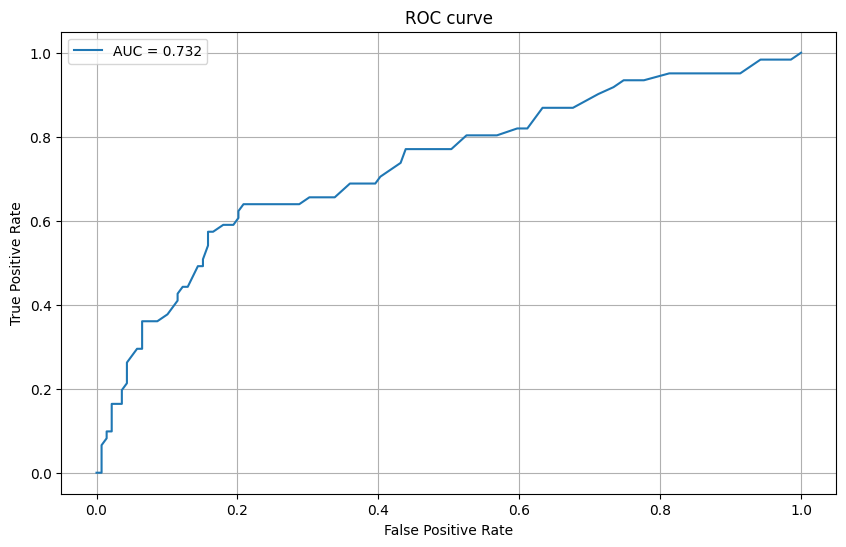

In [39]:
# Create a new dataframe with the top 5 features
top_5_data = sample_data[top_5_features]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a new Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=111)
rf_model.fit(x_train, y_train)

# Do the prediction with predict method
y_pred = rf_model.predict(x_test)

print(y_pred[0:5])

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Now let's calculate the ROC curve with predict method.
# I made a try-except block to catch the ValueError that occurs
# when the ROC curve is calculated with the predict method.
try:
    # Calculate the ROC curve
    fpr, trp = metrics.roc_curve(y_test, y_pred)

    # Calculate the AUC
    auc = metrics.auc(fpr, trp)

    print("AUC: ", auc)
except ValueError as e:
    print("Error: ", e)

# Because the should not be calculated with the predict method, I will use the predict_proba method instead.
y_pred_proba = rf_model.predict_proba(x_test)

print(y_pred_proba[0:5])

# Calculate the ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])

# Calculate the AUC
auc = metrics.auc(fpr, tpr)
print("AUC score: ", auc)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()

In this second exercise, I created a new dataframe with five most important features. I then split it up to get the ratio of training and test set data right again. After splitting, I standardized these data sets so that there were no large differences in the values of the data points. This is naturally followed by training and then the prediction itself.

When calculating the accuracies, I wanted to see what would happen if I used the pred method for the ROC and AUC calculations, which causes the problem of too many uncompressed values. I'm not sure if this is the reason, but when I looked up the idea of ROC on Wikipedia. This may be because the ROC curve requires a continuous probability measure rather than discrete class labels as the predict method does. As we can see from the first print of the code, the code only has values 0 and 1.

The predict-proba method, on the other hand, returns the probabilities for each class of each sample. This provides a continuous measure of probabilities that can be used to potentially calculate the thresholds for the proportion of true positives and false positives. When we print out the predict-proba method values, we see that each sample has different probability values.

In terms of precision, we actually have slightly lower accuracy than the kNN method. I think the reason for this may be that this Random Forest model uses a smaller number of features to predict. Also, the kNN model used the best k value, which causes the model to run slower. The Random Forest model, on the other hand, is not very well optimized in terms of parameters. Here I pretty much just use the standard parameters of, say, 100 estimators.

# References:

https://realpython.com/train-test-split-python-data/

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

https://en.wikipedia.org/wiki/Overfitting

https://en.wikipedia.org/wiki/Common_brushtail_possum

https://stackoverflow.com/questions/52823128/unsupported-format-string-passed-to-numpy-ndarray

https://en.wikipedia.org/wiki/Random_forest

https://en.wikipedia.org/wiki/Receiver_operating_characteristic